   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [27]:
# !pip install -U sentence-transformers
# !pip install pyvi

# from sentence_transformers import SentenceTransformer
# from pyvi.ViTokenizer import tokenize

# model = SentenceTransformer('VoVanPhuc/sup-SimCSE-VietNamese-phobert-base')
#xem xet lại distribution, độ tương quan sperrman để chọn giá trị theta

sentences = [
            "Thật kinh ngạc, 42 khối vuông hình sắc cạnh không hơn kém nhau 1 gam.", "Thật tuyệt vời, các khối hình đều giống nhau giống nhau một cách đáng kinh ngạc.",
            'Ông Nguyễn Bá Thụ, cục trưởng Cục Kiểm lâm VN, thừa nhận tình trạng vận chuyển, buôn bán hổ và xương hổ trái phép vẫn đang diễn ra tại VN và đặc biệt sôi động ở Hà Nội.',
            "Ông Thụ, cục trưởng Cục Kiểm lâm VN, thừa nhận tình trạng vận chuyển, buôn bán hổ và xương hổ trái phép vẫn đang diễn ra tại VN và đặc biệt sôi động ở Hà Nội.",
            "Đá, bụi, không khí ngột ngạt, nước tuôn xuống và tối tăm khiến chúng tôi lẫn những người thợ lặng người.",
            "Đá, bụi, không khí ngột ngạt, nước tuôn xuống và tối tăm khiến chúng tôi lẫn những người thợ lặng người, nhưng không ngại những khó khăn đó những người thợn lặn vẫn cần mẫn làm việc hàng ngày.",
            "Trước khi vào hầm, kỹ sư Đàm Khắc Lĩnh tự tay phát cho mỗi người một chiếc áo phản quang, một đôi ủng cùng chiếc mũ bảo hộ làm bằng nhựa cứng khá nặng.",
            "Trước khi vào hầm, những con thỏ đều sẽ cảnh giác nhìn xung quanh để xem có những con thú săn mồi nào rình rập gần đó không.",
            "Còn với những người thợ khoan hầm Sông Đà, sự kiện như thế đã từng diễn ra và giờ đây trước mắt họ lại có những công trình mới đang vẫy gọi.",
            "Còn với những người thợ khoan hầm Sông Đà, sự kiện như thế đã xảy ra rất nhiều là và không còn xa lạ với họ nữa."
          ]

# sentences = [tokenize(sentence) for sentence in sentences]
# embeddings = model.encode(sentences)

# from sklearn.metrics.pairwise import cosine_similarity
# # Cosine similarity calculation
# cosine_sim = cosine_similarity([embeddings[0]], [embeddings[5]])
# print(len(embeddings[0]))
# print(cosine_sim)

# cos_similarity_list = []
# for i in range(len(embeddings)):
#     for j in range(i+1, len(embeddings)):  # Avoid redundant pairs (i.e., only upper triangle of the matrix)
#       if cosine_similarity([embeddings[i]], [embeddings[j]]) >= 0.19:
#         cos_similarity_list.append((i, j, cosine_similarity([embeddings[i]], [embeddings[j]])[0][0]))

# print(cos_similarity_list)

def jaccard_similarity(sent1, sent2):
    #tách từ sinh viên => sinh_viên
    #trọng số ?
    # Tokenize the sentences into words
    words1 = set(sent1.lower().split())
    words2 = set(sent2.lower().split())

    # Calculate the intersection and union of the word sets
    intersection = words1.intersection(words2)
    union = words1.union(words2)

    # Jaccard similarity is the size of the intersection divided by the size of the union
    jaccard_score = len(intersection) / len(union) if len(union) > 0 else 0

    return jaccard_score

# Calculate Jaccard similarity between all pairs of sentences
jaccard_similarities = []
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
      if jaccard_similarity(sentences[i], sentences[j]) > 0:
        jaccard_similarities.append((i, j, jaccard_similarity(sentences[i], sentences[j])))
print(jaccard_similarities)

[(0, 1, 0.20833333333333334), (0, 4, 0.02857142857142857), (0, 5, 0.02040816326530612), (0, 9, 0.02564102564102564), (1, 6, 0.022222222222222223), (1, 7, 0.02564102564102564), (2, 3, 0.9428571428571428), (2, 4, 0.01818181818181818), (2, 5, 0.029411764705882353), (2, 8, 0.06451612903225806), (2, 9, 0.034482758620689655), (3, 4, 0.018867924528301886), (3, 5, 0.030303030303030304), (3, 8, 0.06666666666666667), (3, 9, 0.03571428571428571), (4, 5, 0.5555555555555556), (4, 6, 0.019230769230769232), (4, 7, 0.021739130434782608), (4, 8, 0.08333333333333333), (4, 9, 0.12195121951219512), (5, 6, 0.03076923076923077), (5, 7, 0.03389830508474576), (5, 8, 0.06451612903225806), (5, 9, 0.09090909090909091), (6, 7, 0.07407407407407407), (6, 8, 0.03278688524590164), (6, 9, 0.017857142857142856), (7, 8, 0.05555555555555555), (7, 9, 0.02), (8, 9, 0.4358974358974359)]


In [28]:
cosine_similarities = [(0, 1, 0.57669836), (0, 4, 0.19438493), (0, 5, 0.24257833), (0, 6, 0.19310874), (0, 8, 0.23524776), (0, 9, 0.22764196), (1, 2, 0.22627676), (1, 3, 0.22712377), (1, 4, 0.27328432), (1, 5, 0.21707252), (1, 9, 0.23907635), (2, 3, 0.99170446), (2, 5, 0.29667416), (2, 6, 0.2521065), (2, 7, 0.2651556), (2, 8, 0.2300412), (3, 5, 0.2940762), (3, 6, 0.24404815), (3, 7, 0.2751987), (3, 8, 0.21974696), (4, 5, 0.741027), (4, 6, 0.3639425), (4, 7, 0.24513415), (4, 8, 0.4624503), (4, 9, 0.47226423), (5, 6, 0.38030416), (5, 7, 0.3032687), (5, 8, 0.5097456), (5, 9, 0.4364395), (6, 7, 0.42129326), (6, 8, 0.36170316), (6, 9, 0.2826147), (7, 8, 0.26225838), (7, 9, 0.2292777), (8, 9, 0.6986507)]
jaccard_similarities = [(0, 1, 0.20833333333333334), (0, 4, 0.02857142857142857), (0, 5, 0.02040816326530612), (0, 9, 0.02564102564102564), (1, 6, 0.022222222222222223), (1, 7, 0.02564102564102564), (2, 3, 0.9428571428571428), (2, 4, 0.01818181818181818), (2, 5, 0.029411764705882353), (2, 8, 0.06451612903225806), (2, 9, 0.034482758620689655), (3, 4, 0.018867924528301886), (3, 5, 0.030303030303030304), (3, 8, 0.06666666666666667), (3, 9, 0.03571428571428571), (4, 5, 0.5555555555555556), (4, 6, 0.019230769230769232), (4, 7, 0.021739130434782608), (4, 8, 0.08333333333333333), (4, 9, 0.12195121951219512), (5, 6, 0.03076923076923077), (5, 7, 0.03389830508474576), (5, 8, 0.06451612903225806), (5, 9, 0.09090909090909091), (6, 7, 0.07407407407407407), (6, 8, 0.03278688524590164), (6, 9, 0.017857142857142856), (7, 8, 0.05555555555555555), (7, 9, 0.02), (8, 9, 0.4358974358974359)]


def find_adjacent(node_A, node_B, cosine_similarities):
# Identify adjacent nodes for A and B
  adjacent_to_A = []
  for a, b, score in cosine_similarities:
        if a == node_A:
            adjacent_to_A.append(b)
        elif b == node_A:
            adjacent_to_A.append(a)
  try:
    adjacent_to_A.remove(node_B)
  except:
    pass
  adjacent_to_B = []
  for a, b, score in cosine_similarities:
      if b == node_B:
          adjacent_to_B.append(a)
      elif a == node_B:
          adjacent_to_B.append(b)
  try:
    adjacent_to_B.remove(node_A)
  except:
    pass
  # print("adjacent_to_A: ", adjacent_to_A)
  # print("adjacent_to_B: ", adjacent_to_B)
  return adjacent_to_A, adjacent_to_B

def find_sim_score(nodeA, nodeB, edges_list):
    # Find similarity score between two nodes from edges list
    for a, b, score in edges_list:
        if (a == nodeA and b == nodeB) or (a == nodeB and b == nodeA):
            return score
    return 0

def calculate_equation16(nodeA, nodeB, adj_A, adj_B, simScore):
    sum_weight = 0

    # Find common adjacent nodes between nodeA and nodeB
    common_adj = set(adj_A).intersection(set(adj_B))

    for common_node in common_adj:
        # Calculate weight(C,D) = cos_sim(A,C) × cos_sim(B,D)
        weight = (find_sim_score(nodeA, common_node, simScore) *
                 find_sim_score(nodeB, common_node, simScore))
        sum_weight += weight

    return sum_weight

def calculate_equation17(nodeA, nodeB, adj_A, adj_B, simScore):
    sum_weighted = 0

    # Find common adjacent nodes between nodeA and nodeB
    common_adj = set(adj_A).intersection(set(adj_B))

    for node1 in common_adj:
        for node2 in common_adj:
            if node1 < node2:  # To avoid duplicate pairs
                # Get cosine similarity between the common adjacent nodes
                cos_sim = find_sim_score(node1, node2, simScore)

                # Calculate weight(C,D) from equation 16
                weight = (find_sim_score(nodeA, node1, simScore) *
                         find_sim_score(nodeB, node2, simScore))

                # Calculate final weighted value
                weighted = cos_sim * weight
                sum_weighted += weighted

    return sum_weighted

# adjacent_to_1=  [0, 3, 4, 5, 9]
# adjacent_to_2=  [3, 5, 6, 7, 8]
# result = calculate_equation16(1, 2, adjacent_to_1, adjacent_to_2, cosine_similarities)
# result2 = calculate_equation17(1, 2, adjacent_to_1, adjacent_to_2, cosine_similarities)

# print(f"Sum of weights for nodes 1 and 2: {result}")
# print(f"Weighted sum for nodes 1 and 2: {result2}")

def calculate_equation15(nodeA, nodeB, adj_A, adj_B, simScore):
    # Get cos_sim(A,B) - the direct similarity between A and B
    cos_sim_AB = find_sim_score(nodeA, nodeB, simScore)

    # Calculate sum_wtd(A,B) using equation 17
    sum_wtd = calculate_equation17(nodeA, nodeB, adj_A, adj_B, simScore)

    # Calculate sum_w_adj(A,B) using equation 16
    sum_w_adj = calculate_equation16(nodeA, nodeB, adj_A, adj_B, simScore)

    # Final formula: (cos_sim(A,B) + sum_wtd(A,B)) / (1 + sum_w_adj(A,B))
    similarity = (cos_sim_AB + sum_wtd) / (1 + sum_w_adj)

    return similarity


nodeA = 2
nodeB = 3
adjacent_to_1, adjacent_to_2 = find_adjacent(nodeA,nodeB, cosine_similarities)
adjacent_to_1_jackcard, adjacent_to_2_jackcard = find_adjacent(nodeA,nodeB, jaccard_similarities)

final_similarity = calculate_equation15(nodeA, nodeB, adjacent_to_1, adjacent_to_2, cosine_similarities)
final_similarity2 = calculate_equation15(nodeA, nodeB, adjacent_to_1, adjacent_to_2, jaccard_similarities)

print(f"Final similarity score cosine between nodes {nodeA} and {nodeB}: {final_similarity}")
print(f"Final similarity score jaccard between nodes {nodeA} and {nodeB}: {final_similarity2}")
localsim = [final_similarity, final_similarity2]



num_nodes = 10
# Iterate through all pairs of nodes
cosine_similarities_dis = []
jaccard_similarities_dis = []
for node_A in range(num_nodes):
  for node_B in range(node_A + 1, num_nodes):  # Avoid repeating pairs and self-similarity
    adjacent_to_1, adjacent_to_2 = find_adjacent(node_A, node_B, cosine_similarities)
    adjacent_to_1_jackcard, adjacent_to_2_jackcard = find_adjacent(node_A, node_B, jaccard_similarities)
    local_similarity_AB = calculate_equation15(node_A, node_B, adjacent_to_1, adjacent_to_2, cosine_similarities)
    local_similarity_AB_jaccard = calculate_equation15(node_A, node_B, adjacent_to_1_jackcard, adjacent_to_2_jackcard, jaccard_similarities)
    cosine_similarities_dis.append(local_similarity_AB)
    jaccard_similarities_dis.append(local_similarity_AB_jaccard)
print(cosine_similarities_dis)
print(jaccard_similarities_dis)

jsd =0.4700931884913378
def overall_sentence_similarity(localsim:list):
  sum = 0
  mul= 1
  for i in localsim:
    sum = sum + i
    mul = mul * i
  print(sum)
  print(mul)
  return mul/(jsd*sum)

print("Overall: ", overall_sentence_similarity(localsim))


Final similarity score cosine between nodes 2 and 3: 0.873489164139673
Final similarity score jaccard between nodes 2 and 3: 0.9381126444502739
[0.5647502827662144, 0.08037493220461014, 0.07827717679993444, 0.38715536848096194, 0.4247851225539227, 0.3256908960948137, 0.21435861845490994, 0.37704495308217467, 0.4269176913896166, 0.19082242525289303, 0.191630518139563, 0.34901732480743414, 0.3035151812384092, 0.2559104655063582, 0.16417848979701197, 0.3606258733039769, 0.3257789045099378, 0.873489164139673, 0.17465869181122118, 0.43555009302212067, 0.4352759899364827, 0.4078802997660975, 0.41184758020293666, 0.21421346658375012, 0.17415056215461383, 0.4371905801132273, 0.42839884917780807, 0.4225639307775385, 0.40294259331927035, 0.21384247716769533, 0.6857047784849113, 0.5013886333573936, 0.41630567328166906, 0.5484635617710093, 0.6031943295351617, 0.5631891269230326, 0.5226609600397053, 0.6336754745493226, 0.5622332598992253, 0.5846896496676384, 0.59825070445739, 0.4894803118273862, 0.

In [ ]:
#Find the shortest path, no weighted edges

from collections import defaultdict, deque

def build_graph(edges):
    # Build adjacency list
    graph = defaultdict(list)
    for node1, node2, _ in edges:  # Ignore the weight
        graph[node1].append(node2)
        graph[node2].append(node1)
    return graph

def find_shortest_path(graph, start, end):
    # Keep track of visited nodes and their parents
    visited = {start}
    queue = deque([(start, [start])])

    while queue:
        node, path = queue.popleft()

        if node == end:
            return path

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))

    return None

# Build graph and find path
graph = build_graph(cosine_similarities) #jaccard_similarities  #cosine_similarities
path = find_shortest_path(graph, 9, 6)

print(f"Shortest path from node 1 to 7: {path}")
print(f"Number of nodes in path: {len(path)}")

Shortest path from node 1 to 7: [9, 6]
Number of nodes in path: 2


In [ ]:
#Find the shortest path with max weighted edges (weight ở đây vẫn là cos sim bth, chưa phải là local cos sim từ mnet sim)

from collections import defaultdict
import heapq

def build_graph(edges):
    graph = defaultdict(list)
    for node1, node2, weight in edges:
        graph[node1].append((node2, weight))
        graph[node2].append((node1, weight))
    return graph

def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    pq = [(0, start)]
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        if current_node == end:
            break

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node]:
            # Here we use (1 - weight) to maximize similarity
            distance = current_distance + (1 - weight)

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct path
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous[current]
    path.reverse()

    # Calculate total weight
    total_weight = sum(
        graph[path[i]][j][1]
        for i in range(len(path)-1)
        for j, _ in enumerate(graph[path[i]])
        if path[i+1] == graph[path[i]][j][0]
    )

    return path, total_weight

graph = build_graph(cosine_similarities)
path, total_weight = dijkstra(graph, 1, 7)
print(f"Shortest path from node 1 to 7: {path}")
print(f"Total path weight: {total_weight}")

Shortest path from node 1 to 7: [1, 5, 7]
Total path weight: 0.5203412199999999


In [ ]:
#Tài nguyên là cặp từ đồng nghĩa (và trái nghĩa), s1 và s2, tạo ra s1´ bằng cách thay thế những từ đồng nghĩa, trái nghĩa trong s1, làm tương tự với s2 để tạo ra s2´.
#Giả định, câu s1 và s2 là tương đông cao nếu các tập câu s1´ và s2´ cũng là tương đồng cao với nhau.4444
#prasal hoas lai tieng viet, tri_tue_nhan_tao.
#tận dụng kiến trúc đồ thị vô hướng, traveled salesman, s1, s2 không có đường nối trực tiếp

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/ViSentSim-600 - Standard.xlsx')

# Loại bỏ các dòng có giá trị NaN nếu có
df = df.dropna(subset=['Câu 1', 'Câu 2'])

all_sentences = list(df['Câu 1']) + list(df['Câu 2'])

!pip install -U sentence-transformers
!pip install pyvi

from sentence_transformers import SentenceTransformer
from pyvi.ViTokenizer import tokenize

model = SentenceTransformer('VoVanPhuc/sup-SimCSE-VietNamese-phobert-base')

embeddings = model.encode(all_sentences)

from sklearn.metrics.pairwise import cosine_similarity



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [20]:
# Lấy các similarity scores
n = len(df)
scores = []
print("DF length: "  , n)
# Similarity giữa Câu 1 và Câu 2
for i in range(n):
    scores.append(cosine_similarity([embeddings[i]], [embeddings[i+n]]))

# Similarity trong nội bộ Câu 1
for i in range(n):
    for j in range(i+1, n):
        scores.append(cosine_similarity([embeddings[i]], [embeddings[j]]))

# Similarity trong nội bộ Câu 2
for i in range(n, 2*n):
    for j in range(i+1, 2*n):
        scores.append(cosine_similarity([embeddings[i]], [embeddings[j]]))


#scores cho jaccard





DF length:  600
DF length:  600


NameError: name 'jaccard_similarity' is not defined

In [22]:
# Lấy các similarity scores
n = len(df)
scores2 = []
print("DF length: "  , n)
# Similarity giữa Câu 1 và Câu 2
for i in range(n):
    scores2.append(jaccard_similarity(all_sentences[i], all_sentences[i+n]))

# Similarity trong nội bộ Câu 1
for i in range(n):
    for j in range(i+1, n):
        scores2.append(jaccard_similarity(all_sentences[i], all_sentences[j]))

# Similarity trong nội bộ Câu 2
for i in range(n, 2*n):
    for j in range(i+1, 2*n):
        scores2.append(jaccard_similarity(all_sentences[i], all_sentences[j]))

DF length:  600


[[0.5653539]]


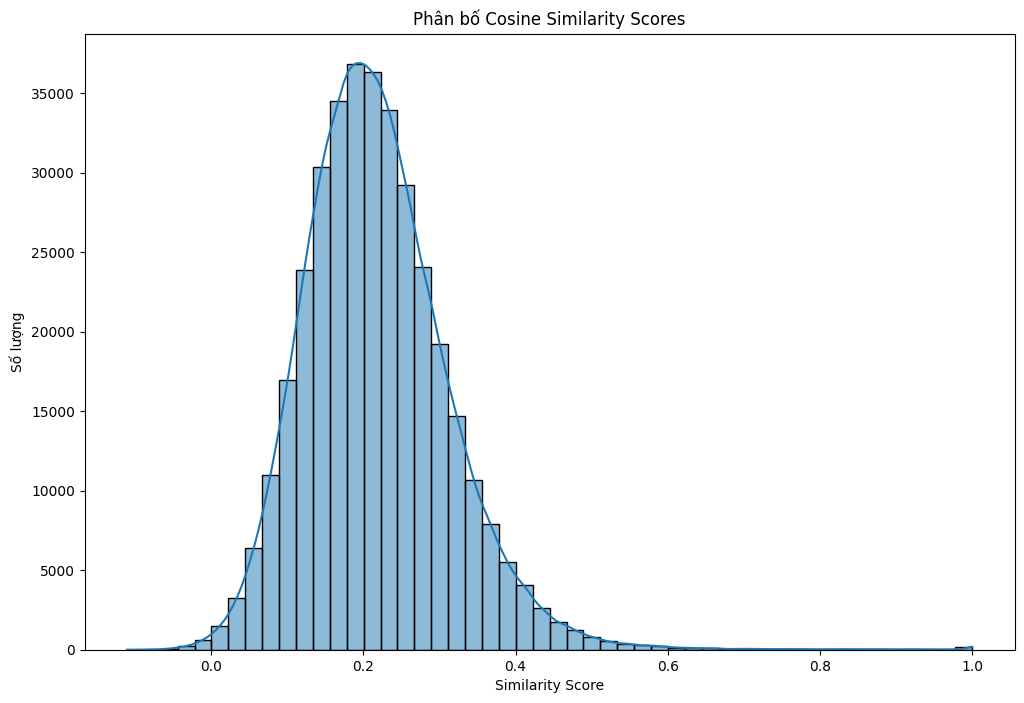

In [ ]:
print(scores[0])
# Chuyển scores thành numpy array 1 chiều
import numpy as np
scores = np.array(scores).flatten()
scores2 = np.array(scores2).flatten()
# Vẽ biểu đồ phân bố
plt.figure(figsize=(12, 8))
sns.histplot(scores, bins=50, kde=True)
plt.title('Phân bố Cosine Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Số lượng')
plt.show()


# Vẽ biểu đồ phân bố
plt.figure(figsize=(12, 8))
sns.histplot(scores2, bins=50, kde=True)
plt.title('Phân bố Jaccard Similarity Scores')
plt.xlabel('Jaccard Score')
plt.ylabel('Số lượng')
plt.show()

[[0.5653539]]


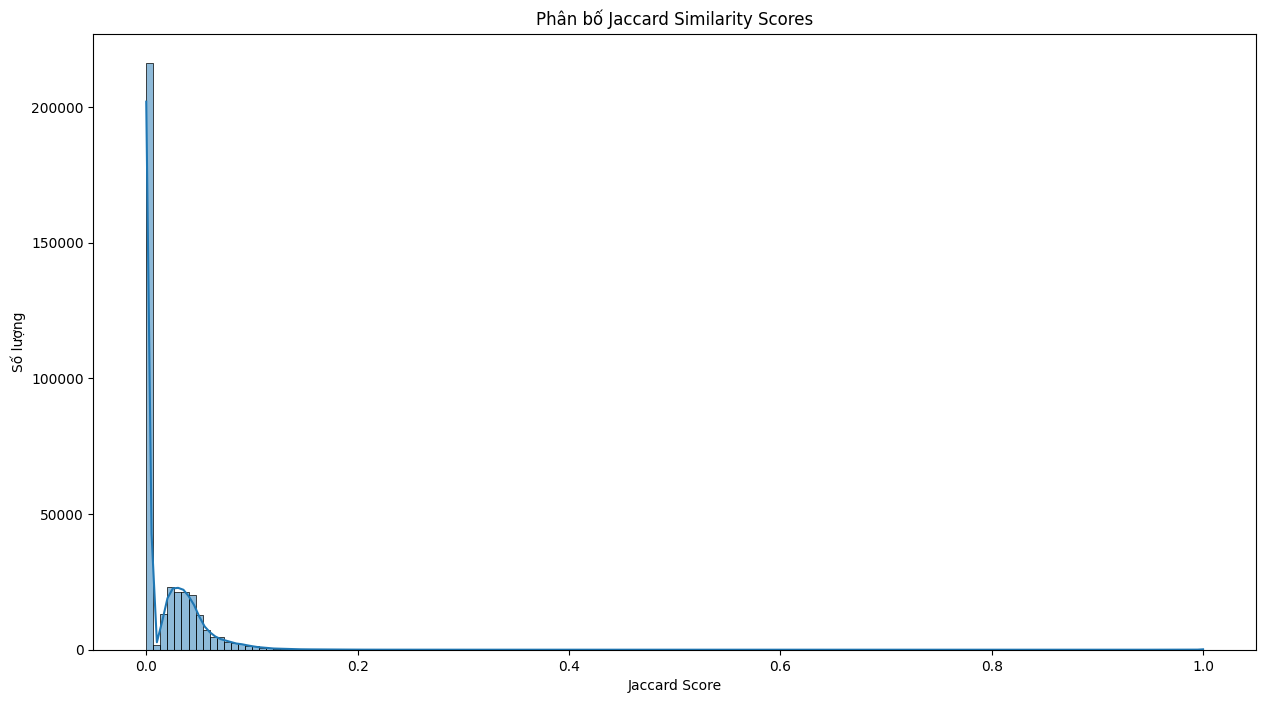

In [25]:
print(scores[0])
# Chuyển scores thành numpy array 1 chiều
import numpy as np

scores2 = np.array(scores2).flatten()



# Vẽ biểu đồ phân bố
plt.figure(figsize=(15, 8))
sns.histplot(scores2, bins=150, kde=True)
plt.title('Phân bố Jaccard Similarity Scores')
plt.xlabel('Jaccard Score')
plt.ylabel('Số lượng')
plt.show()

In [7]:
import numpy as np
from scipy.stats import entropy

cosine_sim_distribution = [0.5647502827662144, 0.08037493220461014, 0.07827717679993444, 0.38715536848096194, 0.4247851225539227, 0.3256908960948137, 0.21435861845490994, 0.37704495308217467, 0.4269176913896166, 0.19082242525289303, 0.191630518139563, 0.34901732480743414, 0.3035151812384092, 0.2559104655063582, 0.16417848979701197, 0.3606258733039769, 0.3257789045099378, 0.873489164139673, 0.17465869181122118, 0.43555009302212067, 0.4352759899364827, 0.4078802997660975, 0.41184758020293666, 0.21421346658375012, 0.17415056215461383, 0.4371905801132273, 0.42839884917780807, 0.4225639307775385, 0.40294259331927035, 0.21384247716769533, 0.6857047784849113, 0.5013886333573936, 0.41630567328166906, 0.5484635617710093, 0.6031943295351617, 0.5631891269230326, 0.5226609600397053, 0.6336754745493226, 0.5622332598992253, 0.5846896496676384, 0.59825070445739, 0.4894803118273862, 0.5129202280927682, 0.4257135090404528, 0.6677304263609378]
phrasal_overlap_distribution = [0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9615384615384616, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5142857142857142]

def calculate_jensen_shannon_divergence(p, q):
    """
    Calculate Jensen-Shannon divergence between two probability distributions

    Args:
        p: First probability distribution
        q: Second probability distribution

    Returns:
        Jensen-Shannon divergence score
    """
    # Ensure the distributions sum to 1
    p = np.asarray(p)
    q = np.asarray(q)
    p = p / np.sum(p)
    q = q / np.sum(q)
    print(p,q)
    # Calculate the middle point
    m = 0.5 * (p + q)

    # Calculate JS divergence
    jsd = 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

    return jsd

def calculate_inter_layer_weight(layer_distributions):
    """
    Calculate inter-layer weight using pairwise Jensen-Shannon divergence

    Args:
        layer_distributions: List of probability distributions for each layer
                           Each distribution should contain similarity scores

    Returns:
        Inter-layer weight (ν)
    """
    n_layers = len(layer_distributions)

    # If only two layers
    if n_layers == 2:
      jensenshannon = calculate_jensen_shannon_divergence(layer_distributions[0],layer_distributions[1])
      print("Jensenshannon1", jensenshannon)
      return jensenshannon


    # For more than two layers, calculate average of all pairwise comparisons
    total_divergence = 0
    pair_count = 0

    # Calculate pairwise JS divergence for all layer combinations
    for i in range(n_layers):
        for j in range(i + 1, n_layers):
            total_divergence += calculate_jensen_shannon_divergence(
                layer_distributions[i],
                layer_distributions[j]
            )
            pair_count += 1

    # Return average divergence as inter-layer weight
    return total_divergence / pair_count

# Example usage:
def example_usage():
    # Example similarity distributions from different layers
    # cosine_sim_distribution = cosine_sim_distribution
    # phrasal_overlap_distribution = phrasal_overlap_distribution
    # euclidean_dist_distribution = [0.75, 0.65, 0.72, 0.88]

    # Calculate inter-layer weight for two layers
    two_layer_weight = calculate_inter_layer_weight([
        cosine_sim_distribution,
        phrasal_overlap_distribution
    ])

    # Calculate inter-layer weight for three layers
    # three_layer_weight = calculate_inter_layer_weight([
    #     cosine_sim_distribution,
    #     phrasal_overlap_distribution
    #     # euclidean_dist_distribution
    # ])

    print(f"Two-layer inter-weight: {two_layer_weight}")
    # print(f"Three-layer inter-weight: {three_layer_weight}")

if __name__ == "__main__":
    example_usage()

[0.03074569 0.00437571 0.0042615  0.02107721 0.02312581 0.01773101
 0.01166994 0.02052678 0.02324191 0.0103886  0.0104326  0.01900092
 0.01652373 0.01393207 0.00893808 0.01963291 0.0177358  0.0475538
 0.00950863 0.02371187 0.02369695 0.0222055  0.02242148 0.01166204
 0.00948097 0.02380118 0.02332255 0.02300489 0.02193668 0.01164184
 0.0373306  0.0272962  0.02266418 0.02985902 0.03283863 0.0306607
 0.02845429 0.03449806 0.03060866 0.03183121 0.03256949 0.0266479
 0.027924   0.02317636 0.03635205] [0.13836095 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.39911814
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.24904972 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.21347119]
Jensenshannon1 0.47009318849133763
Two-laye

In [15]:
import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import entropy

def normalize_distribution(distribution):
    """
    Normalize the distribution so it sums to 1
    """
    distribution = np.array(distribution)
    return distribution / np.sum(distribution)

def calculate_inter_layer_weight(layer_distributions):
    """
    Calculate inter-layer weight (ν) using pairwise Jensen-Shannon divergence

    Args:
        layer_distributions: List of arrays where each array contains
                           the similarity scores from one layer
    Returns:
        float: inter-layer weight (ν)
    """
    # Convert to numpy arrays and normalize each distribution
    distributions = [normalize_distribution(layer) for layer in layer_distributions]
    print(distributions)
    n_layers = len(distributions)

    # For two layers
    if n_layers == 2:
      print("Jensenshannon2: ", jensenshannon(distributions[0], distributions[1]))
      return jensenshannon(distributions[0], distributions[1]) ** 2

    # For multiple layers, calculate average pairwise JS divergence
    total_divergence = 0
    n_pairs = 0

    for i in range(n_layers):
        for j in range(i + 1, n_layers):
            div = jensenshannon(distributions[i], distributions[j])
            total_divergence += div
            n_pairs += 1

    return total_divergence / n_pairs

# Test/Example usage
def test_inter_layer_weight():
    # Example similarity scores from different layers
    # These should be actual similarity scores from your network layers
    # layer1_scores = [0.8, 0.6, 0.7, 0.9]
    # layer2_scores = [0.7, 0.5, 0.8, 0.85]

    # Calculate ν for two layers
    v = calculate_inter_layer_weight([ cosine_sim_distribution, phrasal_overlap_distribution])
    print(f"Inter-layer weight (ν) for two layers: {v}")

    # Test with three layers
    # layer3_scores = [0.75, 0.65, 0.72, 0.88]
    # v = calculate_inter_layer_weight([layer1_scores, layer2_scores, layer3_scores])
    # print(f"Inter-layer weight (ν) for three layers: {v}")

if __name__ == "__main__":
    test_inter_layer_weight()

[array([0.03074569, 0.00437571, 0.0042615 , 0.02107721, 0.02312581,
       0.01773101, 0.01166994, 0.02052678, 0.02324191, 0.0103886 ,
       0.0104326 , 0.01900092, 0.01652373, 0.01393207, 0.00893808,
       0.01963291, 0.0177358 , 0.0475538 , 0.00950863, 0.02371187,
       0.02369695, 0.0222055 , 0.02242148, 0.01166204, 0.00948097,
       0.02380118, 0.02332255, 0.02300489, 0.02193668, 0.01164184,
       0.0373306 , 0.0272962 , 0.02266418, 0.02985902, 0.03283863,
       0.0306607 , 0.02845429, 0.03449806, 0.03060866, 0.03183121,
       0.03256949, 0.0266479 , 0.027924  , 0.02317636, 0.03635205]), array([0.13836095, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.39911814, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.  

In [14]:
from scipy.spatial import distance

distance.jensenshannon(cosine_sim_distribution, phrasal_overlap_distribution) ** 2

0.4700931884913378